In [71]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statistics as stat
import warnings
import os

warnings.filterwarnings('ignore')

In [72]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [73]:
conn_str =f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [74]:
connection = pyodbc.connect(conn_str)

query1 = "Select * from LP1_startup_funding2020"
data2020 = pd.read_sql(query1, connection)

query2 = "Select * from LP1_startup_funding2021"
data2021 = pd.read_sql(query2, connection)

In [75]:
df2018 = pd.read_csv('startup_funding2018.csv')

df2019 = pd.read_csv('startup_funding2019.csv')

In [76]:
df2018['Year']='2018'
df2019['Year']='2019'
data2020['Year']='2020'
data2021['Year']='2021'

In [77]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Year           526 non-null    object
dtypes: object(7)
memory usage: 28.9+ KB


In [78]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
 9   Year           89 non-null     object 
dtypes: float64(1), object(9)
memory usage: 7.1+ KB


# Clean and Concat the 2 csv file 2018&2019

In [79]:
df2019.drop(['Founded', 'Founders', 'Investor'], axis=1, inplace=True)
data2020.drop(['Founded', 'Founders', 'Investor'], axis=1, inplace=True)
data2021.drop(['Founded', 'Founders', 'Investor'], axis=1, inplace=True)

In [80]:
# Select specific columns and rename them
df2018 = df2018.rename(columns={'Company Name': 'Company_Brand', 'Industry': 'Sector', 'Amount': 'Amount', 'About Company': 'BIO', 'Location':'HeadQuarter'})
df2019 = df2019.rename(columns={'Company/Brand': 'Company_Brand', 'Sector': 'Sector', 'Amount($)': 'Amount', 'What it does': 'BIO', 'HeadQuarter':'HeadQuarter'})


In [81]:
df18_19 = pd.concat([df2018, df2019], ignore_index=True)

In [82]:
df18_19.head()

,Company_Brand,Sector,Round/Series,Amount,HeadQuarter,BIO,Year,Stage
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN


In [83]:
# Replace 'Undisclosed' values with NaN
df18_19['Amount'] = df18_19['Amount'].replace('Undisclosed', np.nan, regex=True)
 


In [84]:
# Remove currency symbols and commas
df18_19['Amount'] = df18_19['Amount'].str.replace('₹', '').str.replace('$', '').str.replace(',', '')
 


In [85]:
# Convert the 'Amount' column to numeric values (float)
df18_19['Amount'] = pd.to_numeric(df18_19['Amount'], errors='coerce')


In [86]:
 
# replace the NAN with (0) and Convert the 'Amount' column to integers
df18_19['Amount'] = df18_19['Amount'].fillna(0).astype(int)
 


In [87]:
df18_19.fillna('Unknown', inplace=True)

In [88]:
df18_19['Amount']

0         250000
1       40000000
2       65000000
3        2000000
4              0
         ...    
610     20000000
611    693000000
612      5000000
613     50000000
614     33000000
Name: Amount, Length: 615, dtype: int32

# Clean and Concat the 2 sql file 2020&2021

In [89]:
# Renaming the Column

data2020 = data2020.rename(columns={'Company_Brand': 'Company_Brand', 'Sector': 'Sector', 'Amount': 'Amount', 'What_it_does': 'BIO', 'Location':'HeadQuarter'})
data2021 = data2021.rename(columns={'Company_Brand': 'Company_Brand', 'Sector': 'Sector', 'Amount': 'Amount', 'What_it_does': 'BIO', 'HeadQuarter':'HeadQuarter'})

In [90]:
# Drop a specific column in place

data2020.drop(columns=['column10'], inplace=True)


In [91]:
df20_21 = pd.concat([data2020, data2021], ignore_index=True)

In [92]:
df20_21.describe()

,Company_Brand,HeadQuarter,Sector,BIO,Amount,Stage,Year
count,2264,2169,2251,2264,2007,1372,2264
unique,1745,121,485,2112,578,58,2
top,BharatPe,Bangalore,FinTech,BYJU'S is an educational technology company th...,$Undisclosed,Seed,2021
freq,10,743,173,5,73,326,1209


In [93]:
# Replace 'Undisclosed' values with NaN
df20_21['Amount'] = df20_21['Amount'].replace('Undisclosed', np.nan, regex=True)


In [94]:
 
# Remove currency symbols and commas
df20_21['Amount'] = df20_21['Amount'].str.replace('₹', '').str.replace('$', '').str.replace(',', '')
 


In [95]:
# Convert the 'Amount' column to numeric values (float)
df20_21['Amount'] = pd.to_numeric(df20_21['Amount'], errors='coerce')
 


In [96]:
# replace the NAN with (0) and Convert the 'Amount' column to integers
df20_21['Amount'] = df20_21['Amount'].fillna(0).astype(int)
 


In [97]:
df20_21['Amount']

0              0
1              0
2              0
3              0
4              0
          ...   
2259     3000000
2260    20000000
2261    55000000
2262    26000000
2263     8000000
Name: Amount, Length: 2264, dtype: int32

In [98]:
india_startup_df = pd.concat([df18_19, df20_21], ignore_index=True)

In [99]:
india_startup_df.describe()

,Amount
count,2.879000e+03
mean,1.895922e+07
std,1.684676e+08
min,-2.147484e+09
25%,0.000000e+00
50%,1.800000e+05
75%,5.000000e+06
max,2.029600e+09


Hypothesis: The total funding received by Indian startups has been increasing over the years (from 2018 to 2021).

Explanation: This hypothesis focuses on the trend in total funding over time. To test this hypothesis, you can:

Calculate the total funding received by all startups for each year (2018, 2019, 2020, 2021).
Create a time series plot or line chart to visualize the funding trend over the four years.

In [100]:
total_funding_by_year = india_startup_df.groupby('Year')['Amount'].sum()

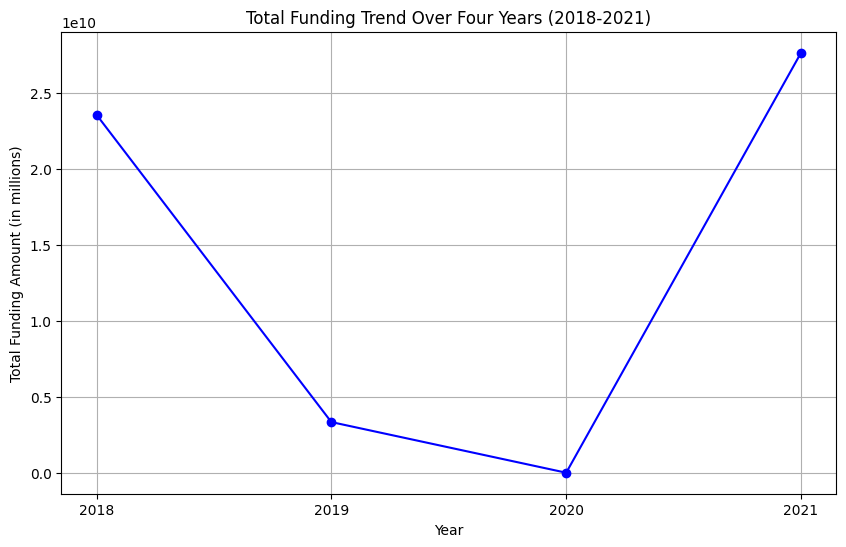

In [102]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(total_funding_by_year.index, total_funding_by_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in millions)')
plt.title('Total Funding Trend Over Four Years (2018-2021)')
plt.grid(True)
plt.show()

Hypothesis: Startups in the AgriTech sector in India receive higher average funding amounts compared to startups in other sectors.

Explanation: You can hypothesize that the AgriTech sector, given its potential for innovation and growth in India, attracts more significant funding. To test this hypothesis, you can:

Calculate the average funding amounts for startups in different sectors.
Perform a statistical test, such as a t-test or ANOVA, to determine if there is a significant difference in funding amounts between the AgriTech sector and other sectors.

In [103]:
from scipy.stats import f_oneway

# Group your data by headquarters location
groups = [india_startup_df[india_startup_df['HeadQuarter'] == location]['Amount'] for location in ['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore']]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*groups)

# Check the p-value to determine statistical significance
if p_value < 0.05:
    print("There is a significant difference in funding amounts between cities.")
else:
    print("There is no significant difference in funding amounts between cities.")


There is no significant difference in funding amounts between cities.
